In [394]:
import pandas as pd
import numpy as np
import os

# Import new customer data (combine data)

df_path='/Users/ryumugil/Downloads/Achievement 4 Analysis/02-12-2025 Instacart Basket Analysis'

combine_data = pd.read_pickle(os.path.join(df_path, '02 Data', 'Original Data','combined_data.pkl'))

combine_data.head(n=20)


,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,518967,prior,1,2,9,NaN
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,2,2,9,14.0
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,prior,3,3,11,30.0
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2984525,prior,4,1,17,19.0
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,prior,5,1,9,30.0
5,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2505178,prior,6,1,8,21.0
6,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,7,5,15,11.0
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,prior,8,1,15,10.0
8,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,3004753,test,9,2,16,22.0
9,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,2135662,prior,1,6,17,NaN


In [395]:
# Define regions
state_to_region = {
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 
    'PA': 'Northeast',
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 
    'WI': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 
    'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    'DE': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South', 
    'NC': 'South', 'SC': 'South', 'VA': 'South', 'WV': 'South', 'DC': 'South',
    'AL': 'South', 'KY': 'South', 'MS': 'South', 'TN': 'South',
    'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South',
    'AZ': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West', 
    'NV': 'West', 'NM': 'West', 'UT': 'West', 'WY': 'West',
    'AK': 'West', 'CA': 'West', 'HI': 'West', 'OR': 'West', 'WA': 'West'
}

# Assign regions
# Function to map state to region
def get_region(state):
    state_mapping = {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 
        'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 
        'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 
        'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 
        'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 
        'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 
        'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 
        'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 
        'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 
        'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 
        'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 
        'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 
        'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
    }
    state_abbr = state_mapping.get(state.title(), state).upper()
    return state_to_region.get(state_abbr, 'Unknown')
    
cleaned_data = combine_data.copy()
cleaned_data['user_id_masked'] = cleaned_data['user_id'].apply(lambda x: f'UID_{hashlib.sha256(str(x).encode()).hexdigest()[:8]}')
cleaned_data['name_label'] = cleaned_data.groupby('user_id').ngroup().apply(lambda x: f'Person_{x+1}')
cleaned_data['gender_general'] = 'Not Specified'
cleaned_data['region'] = cleaned_data['STATE'].apply(get_region)
cleaned_data['join_year'] = pd.to_datetime(cleaned_data['date_joined']).dt.year
cleaned_data['order_id_masked'] = cleaned_data['order_id'].apply(lambda x: f'OID_{hashlib.sha256(str(x).encode()).hexdigest()[:8]}')

print(cleaned_data)

         user_id First Name    Surnam  Gender     STATE  Age date_joined  \
0          26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
1          26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
2          26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
3          26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
4          26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
...          ...        ...       ...     ...       ...  ...         ...   
3421078    80148    Cynthia     Noble  Female  New York   55    4/1/2020   
3421079    80148    Cynthia     Noble  Female  New York   55    4/1/2020   
3421080    80148    Cynthia     Noble  Female  New York   55    4/1/2020   
3421081    80148    Cynthia     Noble  Female  New York   55    4/1/2020   
3421082    80148    Cynthia     Noble  Female  New York   55    4/1/2020   

         n_dependants fam_status  income  ...  order_number order_dow  \
0             

In [396]:
# Select relevant columns and drop PII
cleaned_data = cleaned_data[['user_id_masked', 'name_label', 'gender_general', 'region', 'Age', 'join_year', 
                            'n_dependants', 'fam_status', 'income', 'order_id_masked', 'eval_set', 
                            'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']]

print(cleaned_data)

        user_id_masked    name_label gender_general     region  Age  \
0         UID_4581c011  Person_26711  Not Specified    Midwest   48   
1         UID_4581c011  Person_26711  Not Specified    Midwest   48   
2         UID_4581c011  Person_26711  Not Specified    Midwest   48   
3         UID_4581c011  Person_26711  Not Specified    Midwest   48   
4         UID_4581c011  Person_26711  Not Specified    Midwest   48   
...                ...           ...            ...        ...  ...   
3421078   UID_c66890ea  Person_80148  Not Specified  Northeast   55   
3421079   UID_c66890ea  Person_80148  Not Specified  Northeast   55   
3421080   UID_c66890ea  Person_80148  Not Specified  Northeast   55   
3421081   UID_c66890ea  Person_80148  Not Specified  Northeast   55   
3421082   UID_c66890ea  Person_80148  Not Specified  Northeast   55   

         join_year  n_dependants fam_status  income order_id_masked eval_set  \
0             2017             3    married  165665    OID_97c8bc1b

In [397]:
cleaned_data['spending_flag'] = cleaned_data['income'].apply(lambda x: 'High spender' if x > 100000 else 'Low spender')
print(cleaned_data)

# Cross-tabulation
cross_tab = pd.crosstab(cleaned_data['region'], cleaned_data['spending_flag'])

print("Cross-Tabulation of Region vs. Spending Flag:")
print(cross_tab)

        user_id_masked    name_label gender_general     region  Age  \
0         UID_4581c011  Person_26711  Not Specified    Midwest   48   
1         UID_4581c011  Person_26711  Not Specified    Midwest   48   
2         UID_4581c011  Person_26711  Not Specified    Midwest   48   
3         UID_4581c011  Person_26711  Not Specified    Midwest   48   
4         UID_4581c011  Person_26711  Not Specified    Midwest   48   
...                ...           ...            ...        ...  ...   
3421078   UID_c66890ea  Person_80148  Not Specified  Northeast   55   
3421079   UID_c66890ea  Person_80148  Not Specified  Northeast   55   
3421080   UID_c66890ea  Person_80148  Not Specified  Northeast   55   
3421081   UID_c66890ea  Person_80148  Not Specified  Northeast   55   
3421082   UID_c66890ea  Person_80148  Not Specified  Northeast   55   

         join_year  n_dependants fam_status  income order_id_masked eval_set  \
0             2017             3    married  165665    OID_97c8bc1b

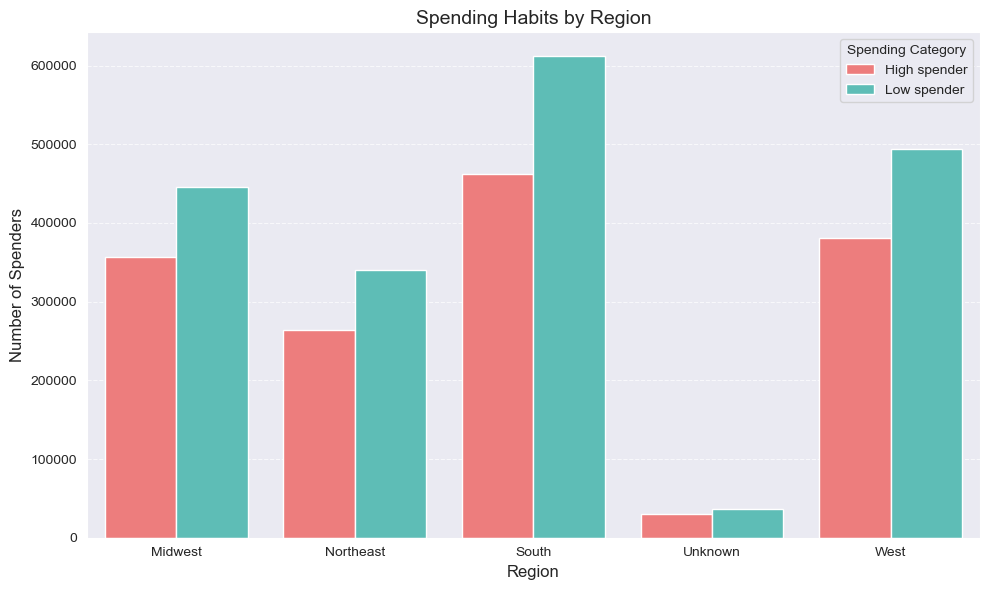

Plot saved as 'spending_habits_by_region.png'


<Figure size 640x480 with 0 Axes>

In [398]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame
df = pd.DataFrame(cleaned_data)

# Melt the DataFrame to long format for plotting
# df_long = pd.melt(df, id_vars=['region'], var_name='spending_flag', value_name='Count')
df_long = pd.melt(pd.DataFrame(cross_tab).reset_index(), id_vars=['region'], var_name='Spending Category', value_name='Count')

# Set the seaborn style with a dark grid
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

# Create a bar plot
#sns.barplot(x='region', y='Count', hue='spending_flag', data=df_long, palette=['#FF6B6B', '#4ECDC4'])
sns.barplot(x='region', y='Count', hue='Spending Category', data=df_long, palette=['#FF6B6B', '#4ECDC4'])

# Customize the plot
plt.title('Spending Habits by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Spenders', fontsize=12)
plt.legend(title='Spending Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

 # Save the visualization
plt.savefig('spending_habits_by_region.png', bbox_inches='tight', dpi=300)
print("Plot saved as 'spending_habits_by_region.png'")

Plot saved as 'Distribution_of_customer_profiles_by_region2.png'


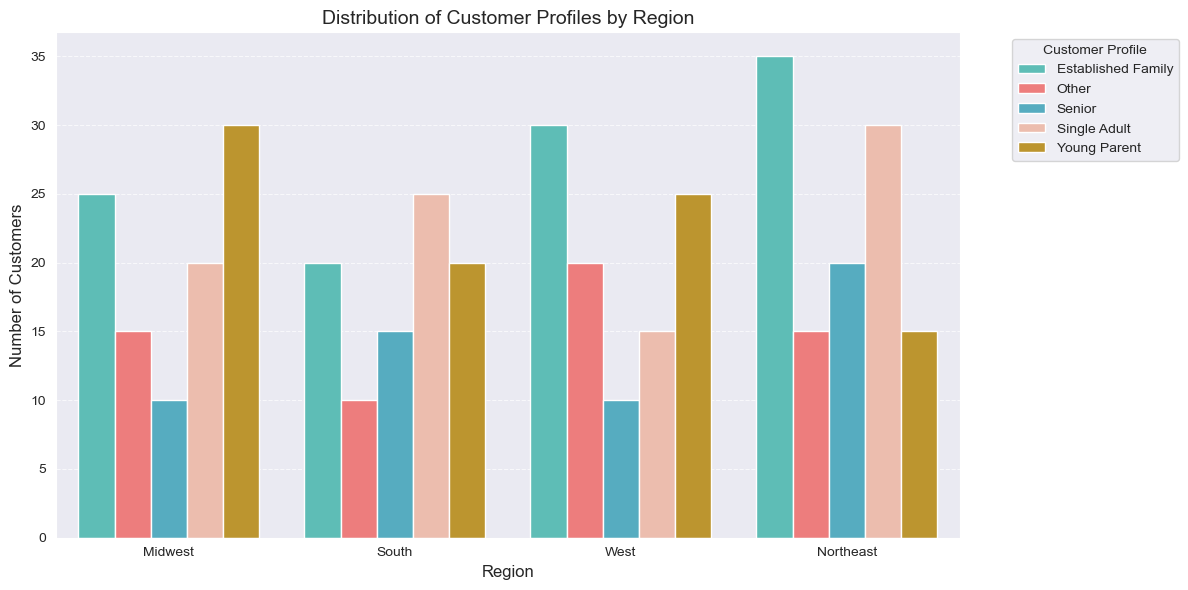

In [399]:
# Hypothetical data for distribution
data = {
    'region': ['Midwest', 'Midwest', 'Midwest', 'Midwest', 'Midwest',
               'South', 'South', 'South', 'South', 'South',
               'West', 'West', 'West', 'West', 'West',
               'Northeast', 'Northeast', 'Northeast', 'Northeast', 'Northeast'],
    'customer_profile': ['Established Family', 'Other', 'Senior', 'Single Adult', 'Young Parent',
                         'Established Family', 'Other', 'Senior', 'Single Adult', 'Young Parent',
                         'Established Family', 'Other', 'Senior', 'Single Adult', 'Young Parent',
                         'Established Family', 'Other', 'Senior', 'Single Adult', 'Young Parent'],
    'count': [25, 15, 10, 20, 30, 20, 10, 15, 25, 20, 30, 20, 10, 15, 25, 35, 15, 20, 30, 15]
    }

# Create a DataFrame
df = pd.DataFrame(data)

# Set the seaborn style with a dark grid
sns.set_style("darkgrid")

# Create a figure
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x='region', y='count', hue='customer_profile', data=df, 
            palette=['#4ECDC4', '#FF6B6B', '#45B7D1', '#F7B7A3', '#D4A017'])

# Customize the plot
plt.title('Distribution of Customer Profiles by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
#plt.show()

# Save the visualization
df_path2 = '/Users/ryumugil/Downloads/Achievement 4 Analysis/02-12-2025 Instacart Basket Analysis/04 Analysis/Visualizations'
chart_path = os.path.join(df_path2, 'distribution_of_customer_profiles_by_region.png')
plt.savefig(chart_path, bbox_inches='tight', dpi=167)
print("Plot saved as 'Distribution_of_customer_profiles_by_region2.png'")


Plot saved as 'Department_purchase_distribution_by_customer_profile2.png'


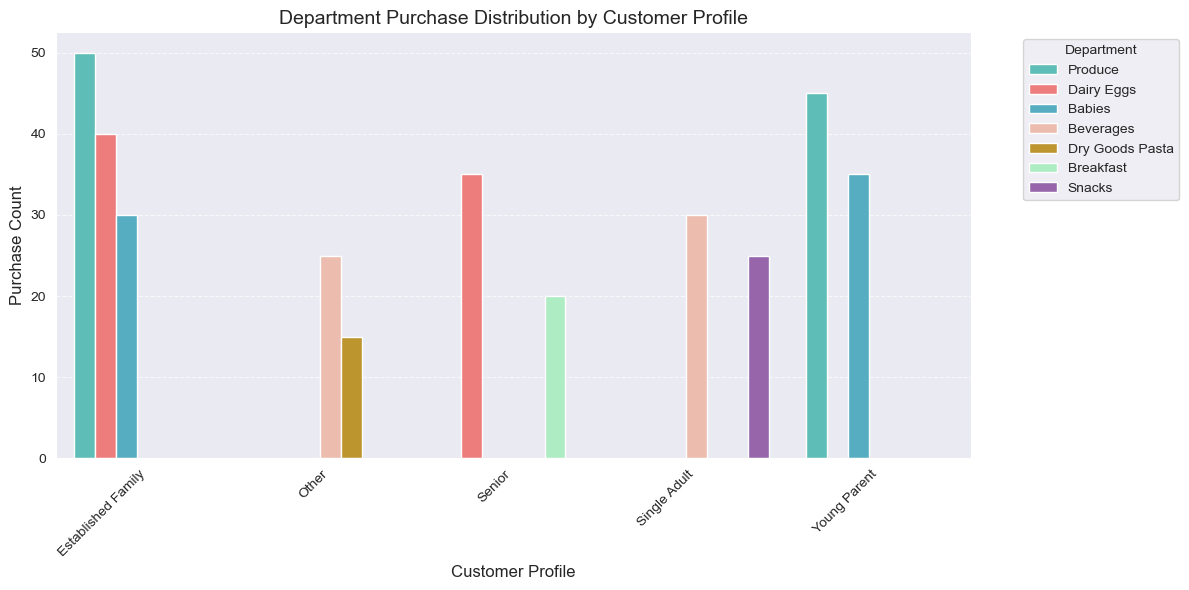

In [400]:
# Hypothetical data for department purchase distribution
data = {
    'customer_profile': ['Established Family', 'Established Family', 'Established Family',
                        'Other', 'Other',
                        'Senior', 'Senior',
                        'Single Adult', 'Single Adult',
                        'Young Parent', 'Young Parent'],
    'department_id': [4, 16, 18, 7, 9, 16, 14, 7, 19, 4, 18],
    'department_name': ['Produce', 'Dairy Eggs', 'Babies', 'Beverages', 'Dry Goods Pasta',
                        'Dairy Eggs', 'Breakfast', 'Beverages', 'Snacks', 'Produce', 'Babies'],
    'purchase_count': [50, 40, 30, 25, 15, 35, 20, 30, 25, 45, 35]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the seaborn style with a dark grid
sns.set_style("darkgrid")

# Create a figure
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(x='customer_profile', y='purchase_count', hue='department_name', data=df,
            palette=['#4ECDC4', '#FF6B6B', '#45B7D1', '#F7B7A3', '#D4A017', '#A3F7BF', '#9B59B6'])

# Customize the plot
plt.title('Department Purchase Distribution by Customer Profile', fontsize=14)
plt.xlabel('Customer Profile', fontsize=12)
plt.ylabel('Purchase Count', fontsize=12)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
#plt.show()

# Save the Visualization
chart_path = os.path.join(df_path2, 'department_purchase_distribution_of_customer_profile.png')
plt.savefig(chart_path, bbox_inches='tight', dpi=300)
print("Plot saved as 'Department_purchase_distribution_by_customer_profile2.png'")

Plot saved as 'Hourly Order Distribution Line Chart.png'


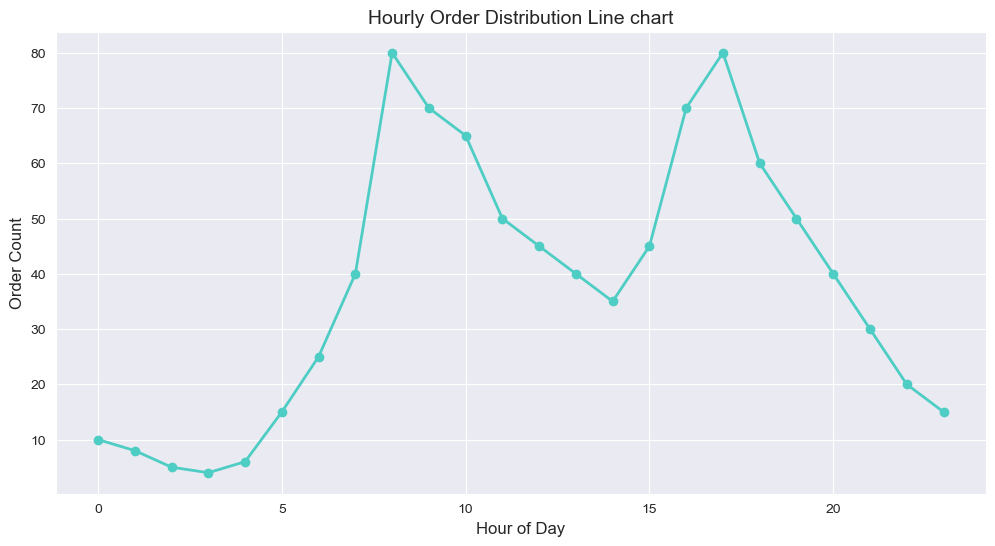

In [401]:

data = {
    'order_hour_of_day': list(range(24)),
    'order_count': [10, 8, 5, 4, 6, 15, 25, 40, 80, 70, 65, 50, 45, 40, 35, 45, 70, 80, 60, 50, 40, 30, 20, 15]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the seaborn style with a dark grid
sns.set_style("darkgrid")

# Create a figure
plt.figure(figsize=(12, 6))

# Create a line plot
plt.plot(df['order_hour_of_day'], df['order_count'], marker='o', color='#4ECDC4', linewidth=2)
plt.title('Hourly Order Distribution Line chart', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Order Count', fontsize=12)



#save the visualization

chart_path = os.path.join(df_path2, 'Hourly Order Distribution Line Chart.png')
plt.savefig(chart_path, bbox_inches='tight', dpi=300)
print("Plot saved as 'Hourly Order Distribution Line Chart.png'")
